In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
os.chdir(r"G:\Projects\Human activity recognition\train.csv")

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
1826,5211,WALKING_DOWNSTAIRS,0.383,-0.03770,-0.0881,-0.0880,-0.00742,-0.357,-0.1340,-0.0756,...,-0.0266,-0.188,-0.525,-0.753,0.0421,0.229,-0.6960,-0.689,0.136,-0.2030
192,586,LAYING,0.278,-0.01730,-0.1060,-0.9980,-0.99700,-0.993,-0.9980,-0.9980,...,0.1880,-0.560,-0.812,-0.253,0.1280,0.427,0.7080,0.395,-0.649,-0.3190
3089,8832,WALKING_DOWNSTAIRS,0.161,-0.00361,-0.1450,0.0762,0.33300,-0.572,-0.0331,0.2020,...,-0.1490,-0.569,-0.883,0.696,0.4310,0.641,0.6680,-0.847,0.202,0.0404
1035,2953,LAYING,0.280,-0.01550,-0.1110,-0.9940,-0.93900,-0.970,-0.9940,-0.9340,...,0.3250,-0.103,-0.566,0.183,-0.1080,0.106,0.1350,0.300,-0.226,-0.7230
1030,2942,LAYING,0.287,-0.01380,-0.1160,-0.9930,-0.98200,-0.990,-0.9940,-0.9810,...,0.1050,-0.108,-0.568,0.141,-0.4130,-0.399,0.0259,0.304,-0.223,-0.7270


In [5]:
print("Shape of the data is {}".format(data.shape))

Shape of the data is (3609, 563)


In [6]:
label= data['activity']
data= data.drop(['rn','activity'], axis=1)
label_keys = label.unique().tolist()
label = np.array(label)
print('Activity labels: ' + str(label_keys))


Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [7]:
#check for missing values
data.isnull().sum()

tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
tBodyAcc.std.X                         0
tBodyAcc.std.Y                         0
tBodyAcc.std.Z                         0
tBodyAcc.mad.X                         0
tBodyAcc.mad.Y                         0
tBodyAcc.mad.Z                         0
tBodyAcc.max.X                         0
tBodyAcc.max.Y                         0
tBodyAcc.max.Z                         0
tBodyAcc.min.X                         0
tBodyAcc.min.Y                         0
tBodyAcc.min.Z                         0
tBodyAcc.sma                           0
tBodyAcc.energy.X                      0
tBodyAcc.energy.Y                      0
tBodyAcc.energy.Z                      0
tBodyAcc.iqr.X                         0
tBodyAcc.iqr.Y                         0
tBodyAcc.iqr.Z                         0
tBodyAcc.entropy.X                     0
tBodyAcc.entropy.Y                     0
tBodyAcc.entropy

In [8]:
#normalize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data= sc.fit_transform(data)

### K means clustering

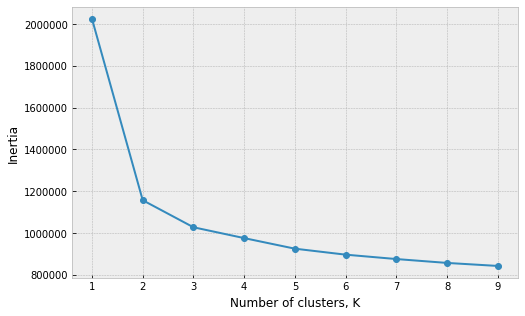

In [9]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertias= []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias,'-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### Looks like the best value ("elbow" of the line) for k is 2 (two clusters).

In [14]:
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
def k_means(n_clust, data_frame, true_labels):
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [15]:
k_means(n_clust=2,data_frame=data,true_labels=label)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.378    0.390


### It looks like algorithm found patterns for Moving and Not-Moving activity with high level of accuracy.

In [18]:
# change labels into binary: 0-not moving, 1-moving
label_binary = label.copy()
for i in range(len(label_binary)):
    if (label_binary[i]=='STANDING' or label_binary[i]=='SITTING' or label_binary[i]=='LAYING'):
        label_binary[i]=0
    else:
        label_binary[i]=1
label_binary= np.array(label_binary.astype(int))
    

In [20]:
k_means(n_clust=2, data_frame=data, true_labels=label_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.977    0.390


### Principal component analysis (PCA)

In [28]:
from sklearn.decomposition import PCA
pca= PCA()
x_pca = pca.fit_transform(data)
features= range(pca.n_components_)

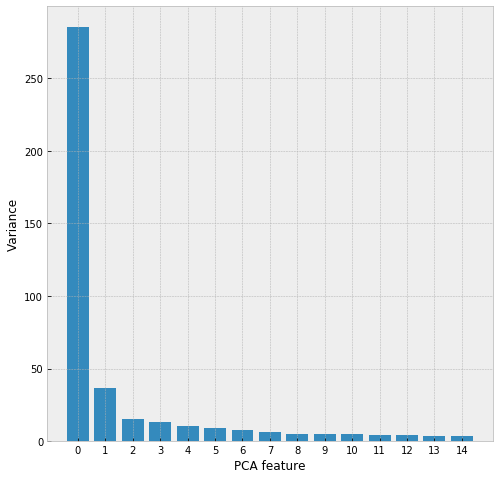

In [29]:
plt.figure(figsize= (8,8))
plt.bar(features[:15], pca.explained_variance_[:15])
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

### 1 feature seems to be the best fit.

In [30]:
pca_new = PCA(n_components=3)
x_new = pca_new.fit_transform(data)

In [31]:
k_means(n_clust=2, data_frame=x_new, true_labels=label)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
349388   0.378   0.981   0.546   0.329   0.378    0.662


In [32]:
x_new.shape

(3609, 3)

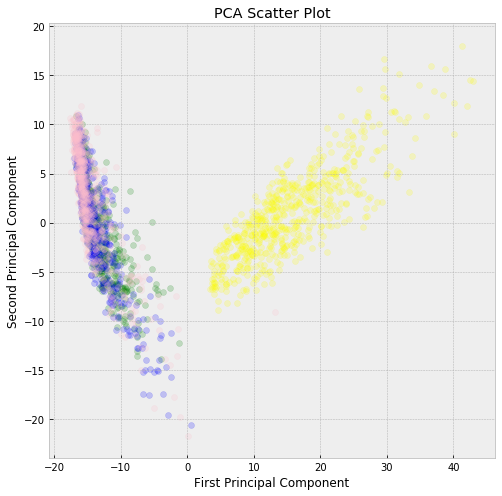

In [58]:
colors= ['green','blue','pink','yellow']
fig= plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for i in range(len(colors)):
    x= x_new[:,0][label==label_keys[i]]
    y= x_new[:,1][label==label_keys[i]]
    ax.scatter(x,y,c=colors[i], alpha=0.2)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title("PCA Scatter Plot")
plt.show()


In [62]:
pca_new = PCA(n_components=1)
x_new = pca_new.fit_transform(data)
k_means(n_clust=2, data_frame=x_new, true_labels=label)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,623,668,0,0,8
1,1,0,0,603,493,533


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.378   0.980   0.546   0.329   0.378    0.794


### Inertia and Silhouette seems to be much better now after reduction.

In [63]:
## Checking for clustering model for 2 components.

In [64]:
pca_new = PCA(n_components=2)
x_new = pca_new.fit_transform(data)
k_means(n_clust=2, data_frame=x_new, true_labels=label)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,679,622,668,0,0,6
1,2,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295753   0.377   0.978   0.545   0.329   0.377    0.694


### No improvement here